# What happens when we model without standardization

In [238]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

## Helper function
def draw_line(coef,intercept, mi, ma):
  points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
  return points[:,0], points[:,1]

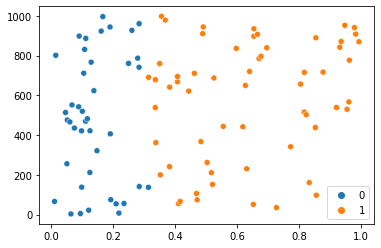

In [239]:
## Let's create two featured data points 
## in which f1 and f2 are not in the same scale
## f1: 0->1 and f2: 0->100
n_points = 100
f1 = sorted(np.random.uniform(low=0, high=1, size=n_points))
f2 = np.random.uniform(low=0, high=1000, size=n_points)


X = np.zeros((n_points,2))
X[:,0] = f1; X[:,1] = f2
y = sorted(np.random.randint(0,2,size=n_points))

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [240]:
data = pd.DataFrame(data= {'f1': f1, 'f2': f2, 'y': y})
data.corr()['y']

f1    0.814414
f2    0.151160
y     1.000000
Name: y, dtype: float64

* Here, f1 is more correlated with 'y' than f2.
* Ideally the weight associated with f1 should be larger than f2. (i.e **w1>>w2**)

In [241]:
## Let's find the best 'w's using the logistic regression. 
clf1 = SGDClassifier(loss='log')
clf1.fit(X,y)

w_o_std_w1, w_o_std_w2 = clf1.coef_[0]
slope = -w_o_std_w1/w_o_std_w2
print(f"Weights without standardization on the features\n w_o_std_w1: {round(w_o_std_w1)},\n w_o_std_w2: {round(w_o_std_w2)} \n slope of the line(in degrees): {round(np.degrees(np.arctan(slope)))}")

Weights without standardization on the features
 w_o_std_w1: 777.0,
 w_o_std_w2: 1724.0 
 slope of the line(in degrees): -24.0


* Even if the f1 is more correlated to 'y', w1 is smaller than w2. 
* This is because the f2's scale is larger than f1's

In [242]:
## Standardize the data with StandardScaler
standardized_X = StandardScaler().fit_transform(X)
clf2 = SGDClassifier(loss='log')
clf2.fit(standardized_X,y)

with_std_w1, with_std_w2 = clf2.coef_[0]
slope = -with_std_w1/with_std_w2
print(f"Weights with standardization on the features\n with_std_w1: {round(with_std_w1)},\n with_std_w2: {round(with_std_w2)} \n slope of the line(in degrees): {round(np.degrees(np.arctan(slope)))}")


Weights with standardization on the features
 with_std_w1: 31.0,
 with_std_w2: 0.0 
 slope of the line(in degrees): -90.0


* But, after the standardization, the feature with the more importance is given the larger weight than the lesser one.

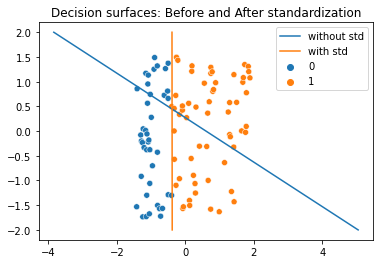

In [243]:
## Visualizing the decision surface before and after standardization
line1_x, line1_y = draw_line(clf1.coef_[0], clf1.intercept_[0],-2,2)
line2_x, line2_y = draw_line(clf2.coef_[0], clf2.intercept_[0],-2,2)

plt.title("Decision surfaces: Before and After standardization")
sns.scatterplot(x=standardized_X[:,0], y=standardized_X[:,1], hue=y)
sns.lineplot(x=line1_x, y=line1_y, label="without std")
sns.lineplot(x=line2_x, y=line2_y, label="with std")
plt.show()

* Line(blue) without standardization is biased towords the feature(f2).
* Orange line(with standardized features) is the perfect solution to the given problem.